# Import Libraries

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [7]:
# Make sure 'complaints.csv' is in the same folder as this notebook
df = pd.read_csv("complaints.csv", low_memory=False)

# Clean and Prepare Data

###  Adjust the datatypes and removes unnecessary spaces of the columns

In [66]:
df = df.dropna(subset=['Consumer complaint narrative'])
df.shape
df.to_csv("complain_dataset.csv")

In [9]:

df.columns = df.columns.str.strip()  # remove spaces from column names
df['Complaint ID'] = df['Complaint ID'].astype(int)
df["Date received"] = pd.to_datetime(df["Date received"], errors="coerce")

In [10]:
df.columns = df.columns.str.strip()
df["Date received"] = pd.to_datetime(df["Date received"], errors="coerce")
df["Date sent to company"] = pd.to_datetime(df["Date sent to company"], errors="coerce")


# Keep 20000 rows for ease of analysis 

In [11]:
df = df.head(20000)
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4,2020-05-08,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,These are not my accounts.,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NV,89030,NaN,Consent provided,Web,2020-05-08,Closed with explanation,Yes,NaN,3642453
11,2024-01-05,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,Kindly address this issue on my credit report....,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,IL,60502,NaN,Consent provided,Web,2024-01-05,Closed with non-monetary relief,Yes,NaN,8113747
15,2025-02-14,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,There are XXXX collections being reported to t...,Company believes it acted appropriately as aut...,"Lockhart, Morris & Montgomery Inc.",FL,33801,NaN,Consent provided,Web,2025-02-21,Closed with explanation,Yes,NaN,12085091
44,2025-07-31,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"Good day, filing this complaint to follow up m...",NaN,"EQUIFAX, INC.",WV,254XX,NaN,Consent provided,Web,2025-07-31,Closed with explanation,Yes,NaN,15008491
59,2025-07-21,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,I am writing to have the following information...,NaN,"EQUIFAX, INC.",MD,21244,NaN,Consent provided,Web,2025-07-21,Closed with non-monetary relief,Yes,NaN,14774438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138197,2022-03-30,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"I DO NOT CONSENT TO, AUTHORIZE NOR BENEFIT FRO...",NaN,"EQUIFAX, INC.",DC,20002,NaN,Consent provided,Web,2022-03-30,Closed with explanation,Yes,NaN,5384143
138206,2024-03-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,I am writing to file a complaint regarding a v...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32909,NaN,Consent provided,Web,2024-03-20,Closed with explanation,Yes,NaN,8588585
138212,2024-06-04,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,I am writing to formally lodge a complaint con...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,IL,60901,NaN,Consent provided,Web,2024-06-04,Closed with explanation,Yes,NaN,9176689
138215,2024-04-23,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Was not notified of investigation status or re...,I have consistently maintained on-time payment...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,751XX,NaN,Consent provided,Web,2024-04-23,Closed with non-monetary relief,Yes,NaN,8831475


## Show missing values of the dataset

In [12]:
print("Dataset shape:", df.shape)
print("\nMissing values per column:\n", df.isna().sum().sort_values(ascending=False).head(10))


Dataset shape: (20000, 18)

Missing values per column:
 Consumer disputed?              19137
Tags                            18115
Company public response          9405
Sub-issue                        1648
Sub-product                       267
State                              53
Date received                       0
Submitted via                       0
Timely response?                    0
Company response to consumer        0
dtype: int64


## Companies with Most Fraud-related Complaints

In [13]:

# Filter fraud-related issues (using keywords)
fraud_df = df[df["Issue"].str.contains("fraud|scam|identity theft", case=False, na=False)]
top_fraud_companies = fraud_df["Company"].value_counts().head(10)
top_fraud_states = fraud_df["State"].value_counts().head(10)


In [14]:
print("\nTop 10 Companies with Fraud-related Complaints:\n", top_fraud_companies)
print("\nTop 10 States with Fraud-related Complaints:\n", top_fraud_states)



Top 10 Companies with Fraud-related Complaints:
 Company
Experian Information Solutions Inc.       44
EQUIFAX, INC.                             39
TRANSUNION INTERMEDIATE HOLDINGS, INC.    26
Block, Inc.                               18
JPMORGAN CHASE & CO.                      18
Paypal Holdings, Inc                      18
WELLS FARGO & COMPANY                     16
Early Warning Services, LLC               16
BANK OF AMERICA, NATIONAL ASSOCIATION     13
Coinbase, Inc.                            10
Name: count, dtype: int64

Top 10 States with Fraud-related Complaints:
 State
CA    42
FL    41
TX    30
NY    27
GA    19
IL    15
PA    13
NJ    12
WA    12
VA    11
Name: count, dtype: int64


## Most Disputed Issues & Products

In [15]:

disputed_df = df[df["Consumer disputed?"].str.lower() == "yes"]
top_disputed_issues = disputed_df["Issue"].value_counts().head(10)
top_disputed_products = disputed_df["Product"].value_counts().head(10)

In [16]:
print("\nTop Disputed Issues:\n", top_disputed_issues)
print("\nTop Disputed Products:\n", top_disputed_products)



Top Disputed Issues:
 Issue
Incorrect information on credit report      27
Loan servicing, payments, escrow account    17
Cont'd attempts collect debt not owed       15
Loan modification,collection,foreclosure    12
Dealing with my lender or servicer          10
Disclosure verification of debt              8
Credit reporting company's investigation     7
Account opening, closing, or management      6
False statements or representation           5
Taking out the loan or lease                 5
Name: count, dtype: int64

Top Disputed Products:
 Product
Debt collection            38
Mortgage                   37
Credit reporting           36
Credit card                21
Bank account or service    16
Student loan               13
Consumer Loan              13
Money transfers             3
Prepaid card                3
Payday loan                 1
Name: count, dtype: int64


## Complaint Volume Over Time

In [17]:

complaints_over_time = df.groupby(df["Date received"].dt.to_period("M")).size()
complaints_over_time.index = complaints_over_time.index.to_timestamp()


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


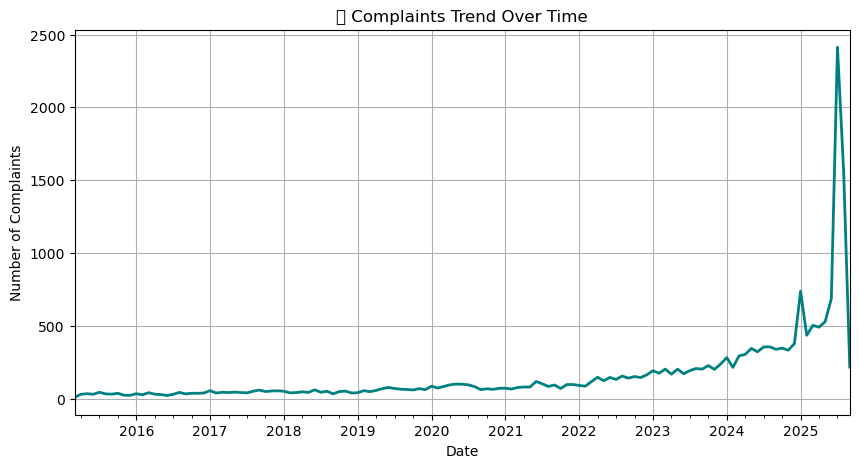

In [18]:
plt.figure(figsize=(10, 5))
complaints_over_time.plot(kind="line", color="teal", linewidth=2)
plt.title("📈 Complaints Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Complaints")
plt.grid(True)
plt.show()

## Average Response Time

In [19]:

df["Response Time (days)"] = (df["Date sent to company"] - df["Date received"]).dt.days
avg_response_by_company = df.groupby("Company")["Response Time (days)"].mean().sort_values().head(10)

print("\nTop 10 Fastest Companies by Average Response Time (days):\n", avg_response_by_company)



Top 10 Fastest Companies by Average Response Time (days):
 Company
1st Franklin Financial Corporation                  0.0
Sequoia Financial Services                          0.0
Guidiville Indian Rancheria                         0.0
Guild Holdings Company                              0.0
Gurstel Law Firm, P.C.                              0.0
HCFS Healthcare Financial Services of TeamHealth    0.0
HEAD MERCANTILE CO., INC.                           0.0
Sentry Recovery and Collections, Inc.               0.0
Sentry Credit, Inc.                                 0.0
Hanwha QCells USA Corp                              0.0
Name: Response Time (days), dtype: float64


## Resolution Success Rate

In [20]:

resolution = (
    df.groupby("Company")["Company response to consumer"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)
print("\nSample of Resolution Success Rate by Company:\n", resolution)



Sample of Resolution Success Rate by Company:
 Company response to consumer        Closed  Closed with explanation  \
Company                                                               
1st Franklin Financial Corporation     0.0                      1.0   
21ST MORTGAGE CORP.                    0.0                      1.0   
2288984 Ontario Inc.                   0.0                      1.0   
A & O Recovery Solutions, LLC          0.0                      0.0   
ACIMA CREDIT, LLC                      0.0                      0.9   
...                                    ...                      ...   
Zions Debt Holdings                    0.0                      1.0   
Zip Co US Inc.                         0.0                      1.0   
ZuntaFi Corp                           0.0                      1.0   
eCon Credit LP                         0.0                      0.0   
eToro USA LLC                          0.0                      1.0   

Company response to consumer

## Timely Response Summary

In [21]:

timely = df["Timely response?"].value_counts(normalize=True) * 100
print("\nTimely Response Rate (%):\n", timely)


Timely Response Rate (%):
 Timely response?
Yes    98.76
No      1.24
Name: proportion, dtype: float64


## Save Clean Data & Results

In [22]:

df.to_csv("complaints_cleaned.csv", index=False)
top_fraud_companies.to_csv("top_fraud_companies.csv")
top_disputed_issues.to_csv("top_disputed_issues.csv")

# Sentiment Analysis Using VADER

## Import Libraries for VADER 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/6c612a95-9c07-40bd-a729-
[nltk_data]     be10b96bcad3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/6c612a95-9c07-40bd-a729-
[nltk_data]     be10b96bcad3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/6c612a95-9c07-40bd-a729-
[nltk_data]     be10b96bcad3/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/6c612a95-9c07-40bd-a729-
[nltk_data]     be10b96bcad3/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/6c612a95-9c07-40bd-a729-
[nltk_data]     be10b96bcad3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_

True

## Prepare Data for Sentiment Analysis 

In [24]:
df = df.reset_index(drop=True)


In [25]:
example = df['Consumer complaint narrative']
print(example)

0                               These are not my accounts.
1        Kindly address this issue on my credit report....
2        There are XXXX collections being reported to t...
3        Good day, filing this complaint to follow up m...
4        I am writing to have the following information...
                               ...                        
19995    I DO NOT CONSENT TO, AUTHORIZE NOR BENEFIT FRO...
19996    I am writing to file a complaint regarding a v...
19997    I am writing to formally lodge a complaint con...
19998    I have consistently maintained on-time payment...
19999    I have tried to send my disputes to the major ...
Name: Consumer complaint narrative, Length: 20000, dtype: object


In [26]:
df = df.dropna(subset=['Consumer complaint narrative'])
print(df.shape)


(20000, 19)


## VADER Seniment Scoring

### Import Libraries for VADER Sentiment Scoring

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

### Run the polarity score on the entire dataset

In [28]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Consumer complaint narrative']
    com_id = row['Complaint ID']
    res[com_id] = sia.polarity_scores(text)

  0%|          | 0/20000 [00:00<?, ?it/s]

### Add sentiment score with entire dataset

In [29]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Complaint ID'})
vaders = vaders.merge(df, how='left')
vaders


,Complaint ID,neg,neu,pos,compound,Date received,Product,Sub-product,Issue,Sub-issue,...,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Response Time (days)
0,3642453,0.000,1.000,0.000,0.0000,2020-05-08,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,...,NV,89030,NaN,Consent provided,Web,2020-05-08,Closed with explanation,Yes,NaN,0
1,8113747,0.136,0.664,0.199,0.4118,2024-01-05,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,...,IL,60502,NaN,Consent provided,Web,2024-01-05,Closed with non-monetary relief,Yes,NaN,0
2,12085091,0.052,0.826,0.122,0.8020,2025-02-14,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,...,FL,33801,NaN,Consent provided,Web,2025-02-21,Closed with explanation,Yes,NaN,7
3,15008491,0.073,0.855,0.072,-0.0516,2025-07-31,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,...,WV,254XX,NaN,Consent provided,Web,2025-07-31,Closed with explanation,Yes,NaN,0
4,14774438,0.040,0.780,0.181,0.9403,2025-07-21,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,...,MD,21244,NaN,Consent provided,Web,2025-07-21,Closed with non-monetary relief,Yes,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5384143,0.250,0.702,0.047,-0.9185,2022-03-30,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,...,DC,20002,NaN,Consent provided,Web,2022-03-30,Closed with explanation,Yes,NaN,0
19996,8588585,0.100,0.820,0.080,-0.7411,2024-03-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,...,FL,32909,NaN,Consent provided,Web,2024-03-20,Closed with explanation,Yes,NaN,0
19997,9176689,0.119,0.743,0.139,0.2146,2024-06-04,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,...,IL,60901,NaN,Consent provided,Web,2024-06-04,Closed with explanation,Yes,NaN,0
19998,8831475,0.076,0.850,0.074,-0.0258,2024-04-23,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Was not notified of investigation status or re...,...,TX,751XX,NaN,Consent provided,Web,2024-04-23,Closed with non-monetary relief,Yes,NaN,0


## Cluster VADER Seniment Score Mapping with Tone

In [30]:

vaders['compound'] = vaders['Consumer complaint narrative'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Define tone based on compound score
vaders['tone'] = vaders['compound'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)


### Sentiment tone count

In [31]:
tone_counts = vaders['tone'].value_counts()
print(tone_counts)


tone
negative    9712
positive    9434
neutral      854
Name: count, dtype: int64


## Visualization of Sentiment distribution

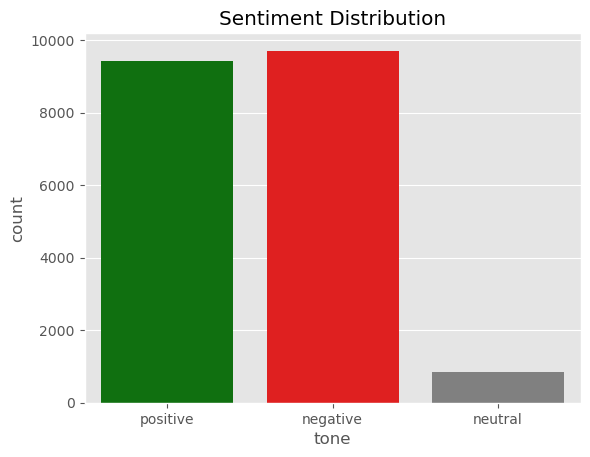

In [32]:
import seaborn as sns

sns.countplot(data=vaders, x='tone', order=['positive','negative','neutral'], palette=['green','red','gray'])
plt.title("Sentiment Distribution")
plt.show()


# Find Common Complaint Clusters Using Latent Dirichlet Allocation (LDA)

In [33]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/6c612a95-9c07-40bd-a729-
[nltk_data]     be10b96bcad3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/6c612a95-9c07-40bd-a729-
[nltk_data]     be10b96bcad3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Process Data for Complain Clustering

In [34]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(tokens)
df1 = df.head(20000)
df1['clean_text'] = df1['Consumer complaint narrative'].apply(preprocess)


/tmp/ipykernel_129/1162230237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clean_text'] = df1['Consumer complaint narrative'].apply(preprocess)


In [35]:
df1['clean_text']

0                                                  account
1        kindly address issue credit report assert acco...
2        xxxx collection reported consumer agency lockh...
3        good day filing complaint follow previous lett...
4        writing following information removed credit f...
                               ...                        
19995    consent authorize benefit following alleged ac...
19996    writing file complaint regarding violation fai...
19997    writing formally lodge complaint concerning in...
19998    consistently maintained ontime payment find pe...
19999    tried send dispute major credit bureau difficu...
Name: clean_text, Length: 20000, dtype: object

## LDA Model Implementation

In [36]:
import gensim
from gensim import corpora

# Tokenize text
texts = [doc.split() for doc in df1['clean_text']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,        # choose number of topics
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")


Topic 1: 0.028*"xxxx" + 0.027*"account" + 0.017*"credit" + 0.013*"card" + 0.012*"bank" + 0.008*"money" + 0.008*"told" + 0.008*"company" + 0.008*"time" + 0.007*"call"
Topic 2: 0.041*"debt" + 0.026*"consumer" + 0.015*"collection" + 0.012*"information" + 0.011*"agency" + 0.009*"law" + 0.007*"notice" + 0.007*"state" + 0.007*"act" + 0.006*"provide"
Topic 3: 0.064*"xxxx" + 0.027*"payment" + 0.020*"loan" + 0.019*"xxxxxxxx" + 0.008*"would" + 0.007*"mortgage" + 0.007*"balance" + 0.007*"time" + 0.007*"month" + 0.007*"paid"
Topic 4: 0.532*"xxxx" + 0.032*"xxxxxxxx" + 0.030*"account" + 0.015*"consumer" + 0.013*"credit" + 0.013*"information" + 0.012*"report" + 0.012*"usc" + 0.011*"reporting" + 0.011*"date"
Topic 5: 0.047*"credit" + 0.036*"report" + 0.028*"account" + 0.024*"information" + 0.023*"reporting" + 0.016*"consumer" + 0.011*"fcra" + 0.011*"inaccurate" + 0.010*"payment" + 0.009*"dispute"


In [28]:
!pip install pyLDAvis==3.4.1 --quiet

## Token Parsing for Cluster

In [42]:
for idx, topic in lda_model.show_topics(num_topics=5, num_words=10, formatted=False):
    words = [word for word, prob in topic]
    print(f"Topic {idx+1}: {', '.join(words)}")



Topic 1: credit, reporting, account, report, fcra, payment, violation, late, act, dispute
Topic 2: nan, ally, levy, invest, mylife, reappeared, formed, tarnish, unidentifiable, yuou
Topic 3: xxxx, account, xxxxxxxx, credit, report, debt, inquiry, collection, balance, number
Topic 4: consumer, information, usc, reporting, report, credit, account, section, agency, right
Topic 5: xxxx, account, payment, credit, loan, bank, card, time, xxxxxxxx, would


## Topic Number Mapping With Cluster Type

In [37]:
topic_labels = {
    
    1: "Debt Collection Practices",
    2: "Loan and Mortgage Payment Issues",
    3: "Credit Reporting Errors",
    4: "Credit Report Disputes",
    5: "Bank Account or Credit Card",
}

In [38]:
topic_assignments = []

for bow in corpus:
    topic_probs = list(lda_model.get_document_topics(bow))
    if topic_probs:
        dominant_topic = max(topic_probs, key=lambda x: float(x[1]))[0]
    else:
        dominant_topic = None
    topic_assignments.append(dominant_topic)

df1['topic_id'] = topic_assignments
df1['topic_id']


/tmp/ipykernel_129/2433024279.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['topic_id'] = topic_assignments


0        4
1        4
2        4
3        4
4        4
        ..
19995    4
19996    4
19997    4
19998    4
19999    4
Name: topic_id, Length: 20000, dtype: int64

In [39]:
df1['topic_name'] = df1['topic_id'].map(topic_labels)

/tmp/ipykernel_129/341838928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['topic_name'] = df1['topic_id'].map(topic_labels)


In [40]:
df1['topic_name']

0        Credit Report Disputes
1        Credit Report Disputes
2        Credit Report Disputes
3        Credit Report Disputes
4        Credit Report Disputes
                  ...          
19995    Credit Report Disputes
19996    Credit Report Disputes
19997    Credit Report Disputes
19998    Credit Report Disputes
19999    Credit Report Disputes
Name: topic_name, Length: 20000, dtype: object

## Complain Dataframe Including Cluster 

In [41]:
df1_clean = df1.dropna(subset=['Complaint ID', 'Consumer complaint narrative', 'topic_name'])
df1_clean[['Complaint ID', 'Consumer complaint narrative', 'topic_name']].head()

,Complaint ID,Consumer complaint narrative,topic_name
0,3642453,These are not my accounts.,Credit Report Disputes
1,8113747,Kindly address this issue on my credit report....,Credit Report Disputes
2,12085091,There are XXXX collections being reported to t...,Credit Report Disputes
3,15008491,"Good day, filing this complaint to follow up m...",Credit Report Disputes
4,14774438,I am writing to have the following information...,Credit Report Disputes


## Visualization of Cluster Based of Complaint

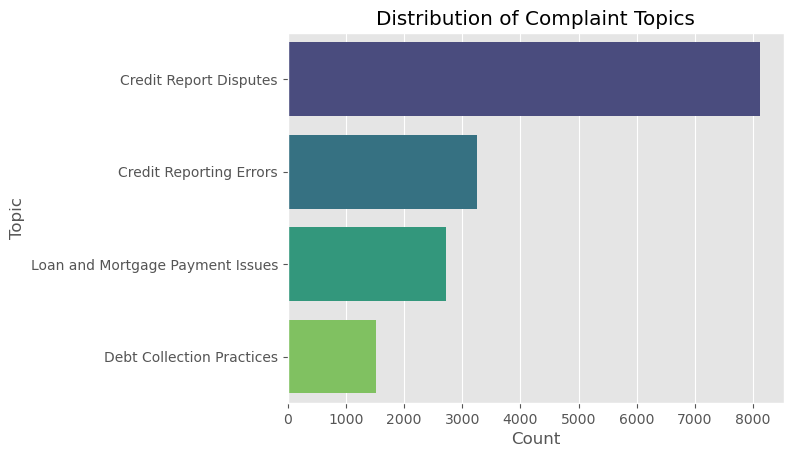

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='topic_name', data=df1_clean, order=df1_clean['topic_name'].value_counts().index, palette='viridis')
plt.title("Distribution of Complaint Topics")
plt.xlabel("Count")
plt.ylabel("Topic")
plt.show()


# Train ML model to auto-flag fraud complaints

## manually create a flag to Define Fraud

In [54]:

import re
import numpy as np

# lower and fillna first
df1_clean['Consumer complaint narrative'] = df1_clean['Consumer complaint narrative'].fillna('').astype(str)
texts = df1_clean['Consumer complaint narrative'].str.lower()

# keywords / phrases that indicate possible fraud
fraud_keywords = [
    r'\bfraud\b', r'\bunauthori[sz]ed\b', r'\bunauthori[sz]ed charge\b',
    r'\bidentity theft\b', r'\bstolen identity\b', r'\bscam\b',
    r'\bunauthori[sz]ed transaction\b', r'\bcard used\b', r'\bcharged me\b',
    r'\bphish(ing)?\b', r'\baccount takeover\b', r'\brepresent fraud\b'
]

pattern = re.compile('|'.join(fraud_keywords), flags=re.IGNORECASE)

df1_clean['Fraud_Flag'] = texts.apply(lambda t: 1 if pattern.search(t) else 0)

# Quick check
print(df1_clean['Fraud_Flag'].value_counts())


/tmp/ipykernel_129/1592709735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean['Consumer complaint narrative'] = df1_clean['Consumer complaint narrative'].fillna('').astype(str)


Fraud_Flag
0    11359
1     4244
Name: count, dtype: int64


/tmp/ipykernel_129/1592709735.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean['Fraud_Flag'] = texts.apply(lambda t: 1 if pattern.search(t) else 0)


## some examples predicted as fraud for manual verification

In [56]:

df1_clean[df1_clean['Fraud_Flag'] == 1]['Consumer complaint narrative'].sample(10, random_state=42).tolist()


["I am submitting this Complaint to delete the following fraudulent information in my Credit file. The items I need deleted are listed in the report. I am a victim of identity theft and did not make the charge nor accounts. I ask that the items be deleted to correct my credit report. I reported the theft of my identity to the Federal Trade Commission and I also have enclosed copies of the Federal Trade Commission 's Identity Theft Report. I offer my testimony herein that I have not authorized or given anyone access to my private and confidential records and certainly not the alleged information showing on my credit report. I therefore request that the Credit Bureaus immediately remove these information from my credit report with your firm pursuant of the FCRA Section 605b. Please delete these items as soon as possible : XXXX XXXX XXXX XXXX XXXX, CO XXXX ; XXXX XXXX XXXX, CO XXXXXXXX XXXX XXXX XXXXXXXX Balance : {$1700.00} ; XXXXXXXX XXXX XXXXXXXX Balance : {$2500.00} ; XXXX XXXX XXXX X

## Clean Text for 'Consumer complaint narrative'

In [57]:
# If you already computed clean_text earlier, skip this block.
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(tokens)

df1_clean['clean_text'] = df1_clean['Consumer complaint narrative'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/6c612a95-9c07-40bd-a729-
[nltk_data]     be10b96bcad3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/6c612a95-9c07-40bd-a729-
[nltk_data]     be10b96bcad3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/tmp/ipykernel_129/1337141241.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean['clean_text'] = df1_clean['Consumer complaint narrative'].apply(clean_text)


## Transforming Cleaned Complaint Narratives into TF-IDF Vectors

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df1_clean['clean_text'])
y = df1_clean['Fraud_Flag'].values



## Make Confirm we have both classes before splitting

In [59]:
import numpy as np
print(np.unique(y, return_counts=True))



(array([0, 1]), array([11359,  4244]))


## Split, Train Dataset and Evaluate the Model

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# stratified split ensures both classes in train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train class distribution:", np.unique(y_train, return_counts=True))
print("Test class distribution:", np.unique(y_test, return_counts=True))

clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# ROC-AUC only if both classes present in y_test
if len(np.unique(y_test)) == 2:
    proba = clf.predict_proba(X_test)[:,1]
    print("ROC-AUC:", roc_auc_score(y_test, proba))
else:
    print("ROC-AUC: not meaningful (only one class present in y_test)")


Train class distribution: (array([0, 1]), array([9087, 3395]))
Test class distribution: (array([0, 1]), array([2272,  849]))
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2272
           1       0.99      0.93      0.96       849

    accuracy                           0.98      3121
   macro avg       0.98      0.96      0.97      3121
weighted avg       0.98      0.98      0.98      3121

[[2264    8]
 [  61  788]]
ROC-AUC: 0.995732344597621


## Test the Model with a test complain either it works fine or not.

In [62]:
new_complaint = "I was charged twice for a transaction I never made. My account was debited fraudulently."

# 1️⃣ Clean the text using the same cleaning function
cleaned = clean_text(new_complaint)

# 2️⃣ Convert to TF-IDF features using the same vectorizer
X_new = vectorizer.transform([cleaned])

# 3️⃣ Predict using your trained model
prediction = clf.predict(X_new)
probability = clf.predict_proba(X_new)[0][1]  # probability of fraud

# 4️⃣ Display result
print("Fraud Flag:", "Fraud" if prediction[0] == 1 else "Not Fraud")
print("Fraud Probability:", round(probability, 3))


Fraud Flag: Not Fraud
Fraud Probability: 0.11


# Distribution of predicted probabilities with visualization

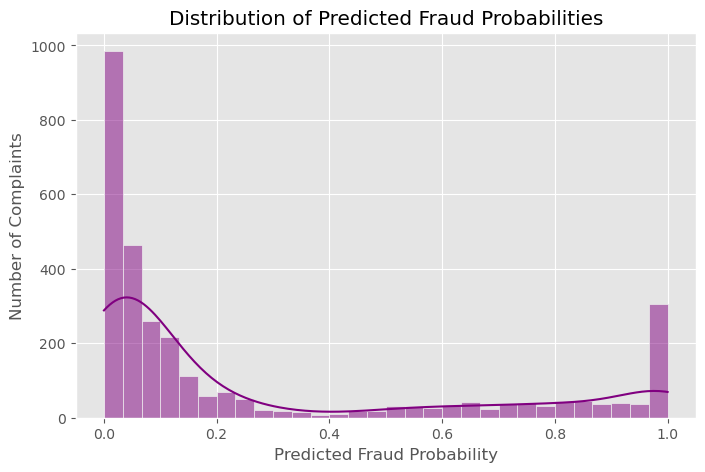

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# predicted probabilities for the positive class (Fraud)
probs = clf.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8,5))
sns.histplot(probs, bins=30, kde=True, color='purple')
plt.xlabel("Predicted Fraud Probability")
plt.ylabel("Number of Complaints")
plt.title("Distribution of Predicted Fraud Probabilities")
plt.show()


## Confusion Matrix Heatmap

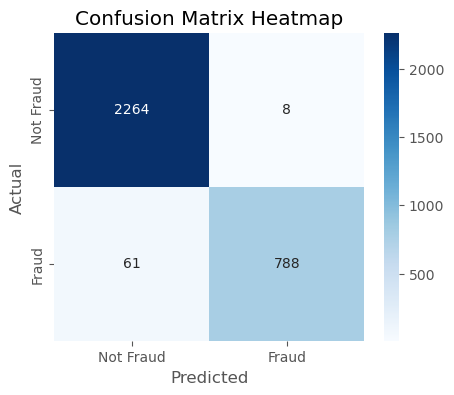

In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud','Fraud'], yticklabels=['Not Fraud','Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()
